In [3]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn import svm
import datetime as dt
from sklearn.ensemble import RandomForestClassifier 

In [4]:
accuracies = []
y_pred_probas = []

def predict(year):
    df_past_1 = pd.read_csv(f'./match_data_yearly/{year-1}.csv')
    df_past_2 = pd.read_csv(f'./match_data_yearly/{year-2}.csv')
    df_past_3 = pd.read_csv(f'./match_data_yearly/{year-3}.csv')
    
    df_past = pd.concat([df_past_3,df_past_2,df_past_1])    
    X_train = df_past[["HomeElo","AwayElo","HomeED","AwayED"]].values
    y_train = df_past["W/L"].values
    
    df_future = pd.read_csv(f'./match_data_yearly/{year}.csv')
    X_test = df_future[["HomeElo","AwayElo","HomeED","AwayED"]].values
    y_test = df_future["W/L"].values
    
    rf= RandomForestClassifier(max_depth=5)  
    rf.fit(X_train,y_train)
    y_pred = rf.predict(X_test)
    y_pred_proba=rf.predict_proba(X_test)
    y_pred_probas.append(y_pred_proba) 
   
    accuracy = rf.score(X_test,y_test) 
    accuracies.append(accuracy)
    
    print(len(df_future[df_future["W/L"]==0]),len(df_future[df_future["W/L"]==1]),len(df_future[df_future["W/L"]==2]))
    print(np.sum(y_pred_proba, axis=0))

In [5]:
for _ in range(10):
    for y in (2013,2014,2015,2016,2017,2018,2019,2020):
        predict(y)

KeyError: "None of [Index(['HomeElo', 'AwayElo', 'HomeED', 'AwayED'], dtype='object')] are in the [columns]"

In [ ]:
accuracies

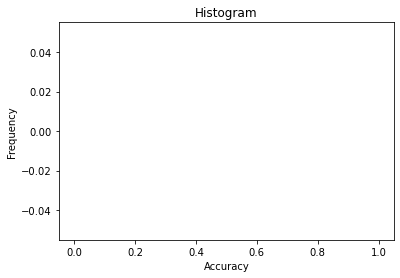

In [6]:
n, bins, patches=plt.hist(accuracies, bins=5)
plt.xlabel("Accuracy")
plt.ylabel("Frequency")
plt.title("Histogram")
plt.show()

In [7]:
np.mean(accuracies)

/home/yokoyama/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/yokoyama/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan

### 考察

2013-2020を予測するシーズンとし､そのシーズンの過去3年間を訓練データとした｡
試合時のEloratingと前月との差分を入力データに使い､勝敗予測の精度を出したところ､2013-2020でおよそ60%台前半にぐらいになる